<a href="https://colab.research.google.com/github/Anagha7777/Machine-Learning/blob/main/LSTM_stock_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf


In [ ]:
start='2010-01-01'
end='2024-06-30'
df=yf.download('AAPL',start,end)


[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473151,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370186,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400680,447610800


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-24,207.720001,212.699997,206.589996,208.139999,208.139999,80727000
2024-06-25,209.149994,211.380005,208.610001,209.070007,209.070007,56713900
2024-06-26,211.500000,214.860001,210.639999,213.250000,213.250000,66213200
2024-06-27,214.690002,215.740005,212.350006,214.100006,214.100006,49772700
2024-06-28,215.770004,216.070007,210.300003,210.619995,210.619995,82542700


In [ ]:
df=df.reset_index()
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473151,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370186,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400680,447610800


In [ ]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


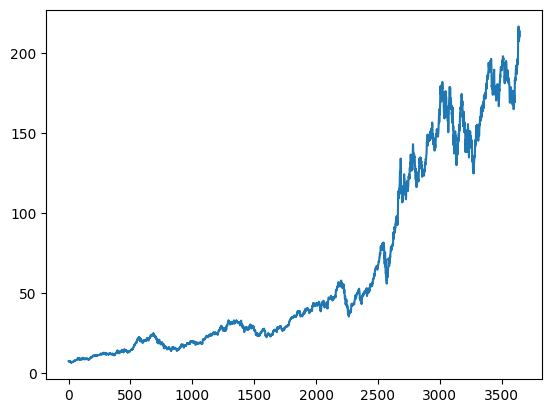

In [ ]:
plt.plot(df.Close)

In [ ]:
df


,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3641,207.720001,212.699997,206.589996,208.139999,80727000
3642,209.149994,211.380005,208.610001,209.070007,56713900
3643,211.500000,214.860001,210.639999,213.250000,66213200
3644,214.690002,215.740005,212.350006,214.100006,49772700


In [ ]:
 ma100=df.Close.rolling(100).mean()
 ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3641    182.3539
3642    182.6006
3643    182.8645
3644    183.1470
3645    183.3764
Name: Close, Length: 3646, dtype: float64

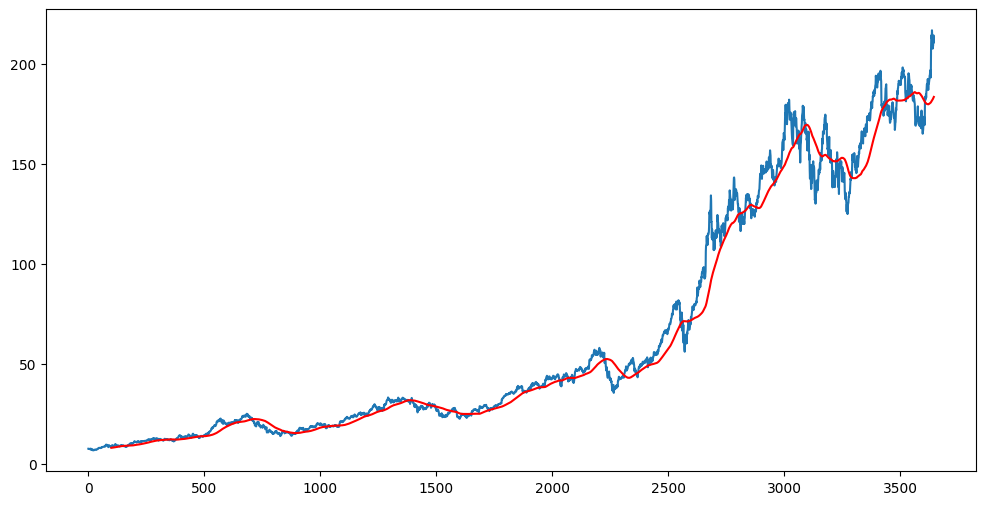

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [ ]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3641    183.01765
3642    183.17520
3643    183.35055
3644    183.52425
3645    183.69585
Name: Close, Length: 3646, dtype: float64

In [ ]:
ma200[201]

8.801417877674103

In [ ]:
ma200[200]

8.784248237609864

In [ ]:
ma200[199]

8.767198238372803

In [ ]:
ma200[198]



nan

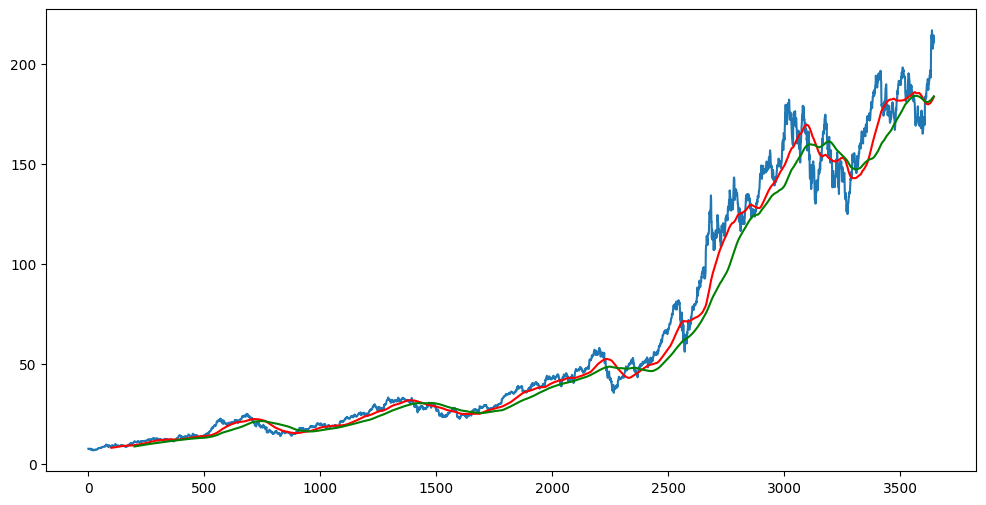

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape


(3646, 5)

In [ ]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2552, 1)
(1094, 1)


In [ ]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [ ]:
data_testing.head()

,Close
2552,72.019997
2553,73.162498
2554,68.379997
2555,68.339996
2556,74.702499


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [ ]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01046536],
       [0.01064169],
       [0.0090166 ],
       ...,
       [0.97698183],
       [0.95279616],
       [0.90319054]])

In [ ]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(2452, 100, 1)

In [ ]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
model=Sequential()


In [ ]:
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
77/77 [==============================] - 58s 567ms/step - loss: 0.0231
Epoch 2/50
77/77 [==============================] - 26s 329ms/step - loss: 0.0054
Epoch 3/50
77/77 [==============================] - 23s 303ms/step - loss: 0.0051
Epoch 4/50
77/77 [==============================] - 26s 337ms/step - loss: 0.0039
Epoch 5/50
77/77 [==============================] - 25s 325ms/step - loss: 0.0035
Epoch 6/50
77/77 [==============================] - 22s 281ms/step - loss: 0.0029
Epoch 7/50
77/77 [==============================] - 25s 330ms/step - loss: 0.0033
Epoch 8/50
77/77 [==============================] - 25s 324ms/step - loss: 0.0026
Epoch 9/50
77/77 [==============================] - 22s 285ms/step - loss: 0.0024
Epoch 10/50
77/77 [==============================] - 24s 306ms/step - loss: 0.0027
Epoch 11/50
77/77 [==============================] - 25s 327ms/step - loss: 0.0028
Epoch 12/50
77/77 [==============================] - 25s 321ms/step - loss: 0.0023
Epoch 13/50
7

In [ ]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
data_testing.head()

,Close
2552,72.019997
2553,73.162498
2554,68.379997
2555,68.339996
2556,74.702499


In [ ]:
past_100_days=data_training.tail(100)

In [ ]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [ ]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [ ]:
final_df.head()

,Close
0,56.147499
1,54.740002
2,55.205002
3,56.752499
4,56.764999


In [ ]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.00869201],
       [0.        ],
       [0.00287161],
       ...,
       [0.97887977],
       [0.98412899],
       [0.96263816]])

In [ ]:
input_data.shape

(1194, 1)

In [ ]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [ ]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1094, 100, 1)
(1094,)


In [ ]:
y_predicted=model.predict(x_test)

35/35 [==============================] - 4s 82ms/step


In [ ]:
y_predicted.shape

(1094, 1)

In [ ]:
y_test

array([0.10671275, 0.11376828, 0.0842339 , ..., 0.97887977, 0.98412899,
       0.96263816])

In [ ]:
y_predicted

array([[0.19826797],
       [0.19806346],
       [0.19739051],
       ...,
       [0.9302956 ],
       [0.93106306],
       [0.9300889 ]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00617551])

In [ ]:
scale_factor=1/0.00617551

In [ ]:
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor


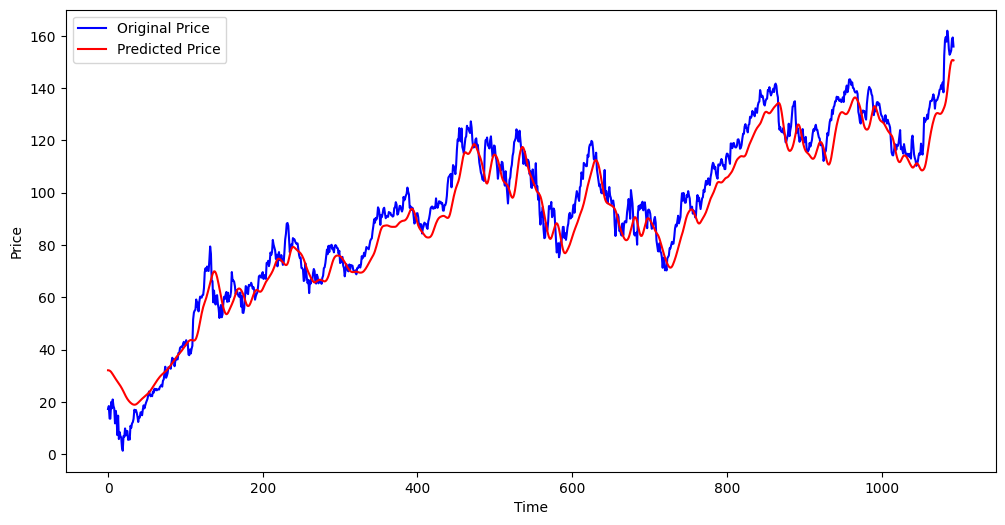

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

In [ ]:
from sklearn.metrics import accuracy_score

y_predicted = model.predict(x_test)
y_predicted = scaler.inverse_transform(y_predicted)

# Reshape y_test to a 2D array before inverse transforming
y_test = y_test.reshape(-1, 1)  # Reshape to a column vector
y_test = scaler.inverse_transform(y_test)

y_predicted = np.round(y_predicted)
y_test = np.round(y_test)

accuracy = accuracy_score(y_test, y_predicted)
print(f'Accuracy: {accuracy}')

35/35 [==============================] - 5s 147ms/step
Accuracy: 0.0


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_predicted and y_test are already calculated and inverse transformed
# as shown in the previous response

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predicted)
print(f'Mean Squared Error (MSE): {mse}')

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_predicted, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_predicted)
print(f'Mean Absolute Error (MAE): {mae}')

# R-squared (R2) Score
r2 = r2_score(y_test, y_predicted)
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error (MSE): 6732745266364.65
Root Mean Squared Error (RMSE): 2594753.4114756742
Mean Absolute Error (MAE): 2448109.9899451556
R-squared (R2) Score: -8.103807812627846


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_predicted)
explained_variance_percentage = r2 * 100

print(f"Explained Variance (R-squared): {explained_variance_percentage:.2f}%")

Explained Variance (R-squared): -810.38%


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test,y_predicted)
accuracy=100-mape
print(f'Meab Absolute Percentage Error: {mape:2f}%')
print(f'Accuracy: {accuracy:2f}%')

Meab Absolute Percentage Error: 0.999928%
Accuracy: 99.000072%
